# <center> Quantization Error </center>

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../_Modules/')

from qm import QuineMcCluskey
qm = QuineMcCluskey()

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [18]:
# CSS
from IPython.core.display import HTML
def css_styling():
    styles = open("../Styles/Custom.css", "r").read()
    return HTML(styles)
css_styling()

Sampling a signal causes rounding errors, produced by the difference in the actual value of the signal to the measurable value. The degree of this error is directly proportional to the number of bits (resolution) used to measure the signal's value and the number of points used to sample the signal. Besides increasing the resolution, the quantization error can also be reduced by altering the shape of the signal. Depicted below is a representation of this process:

<img src="./Images/Analysis.png" height="650" width="550"/>
![](D:/_TinyHawk/Simulation/Quantization/Images/Analysis.png)

In [3]:
# Constants
numBits = 8
resolution = 2**numBits-1
numSteps = 8 # Counter checks 2pi/numSteps
angles = np.linspace(0, 2*np.pi, numSteps, endpoint=False)

In [4]:
def calcError(amp=resolution, offset=0, shift=0, numSteps=8):
    error = 0
    for angle in angles:
        val = amp * np.sin(angle + shift) + offset
        error += (val - np.rint(val))**2
    return 10*np.log10(error/numSteps)

### <center> Quantization Error </center>
The three main adjustment parameters here are offset, phase shift, and amplitude. To get a general sense of the effect these parameters have on the quantization error, the three plots below were made, each holding two of the parameters constant while varying the third parameter. 

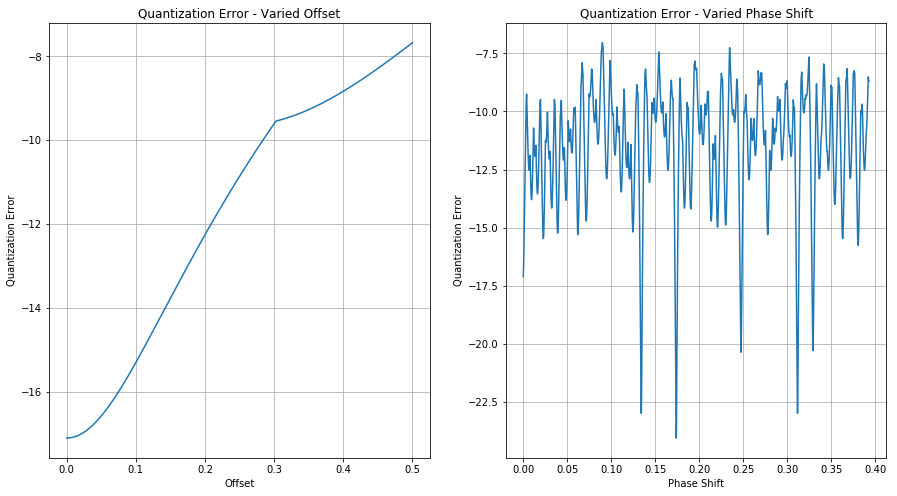

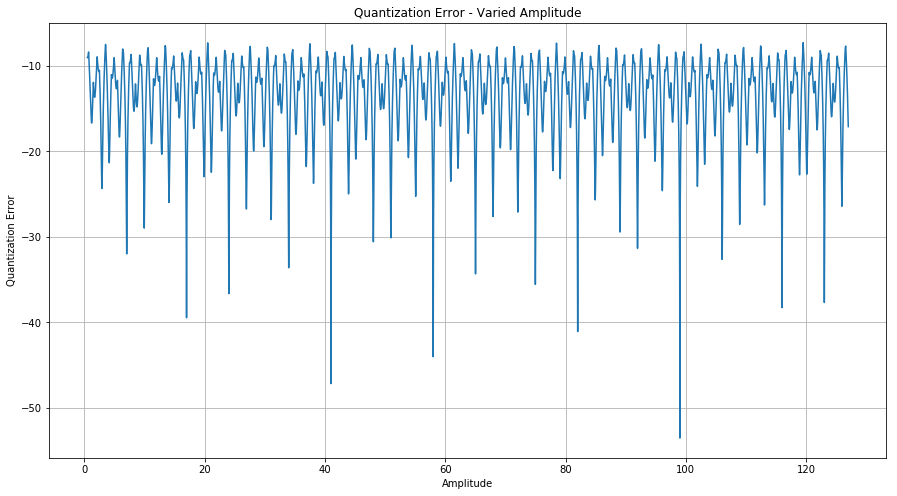

In [5]:
# Quantization Error

# Varying the offset
plt.subplot(1, 2, 1)
offsets = np.linspace(0, 0.5, 10000)

rmsErrors = []
for offset in offsets:
    rmsErrors.append(calcError(resolution/2, offset, 0))
plt.plot(offsets, rmsErrors)
plt.grid(which='both')
plt.title('Quantization Error - Varied Offset')
plt.xlabel('Offset')
plt.ylabel('Quantization Error')

# Varying the phase shift
plt.subplot(1, 2, 2)
phaseShifts = np.linspace(0, np.pi/8, 10001)

rmsErrors = []
for shift in phaseShifts:
    rmsErrors.append(calcError(resolution/2, 0, shift))
plt.plot(phaseShifts, rmsErrors)
plt.grid(which='both')
plt.title('Quantization Error - Varied Phase Shift')
plt.xlabel('Phase Shift')
plt.ylabel('Quantization Error')

# Varying the amplitude
plt.figure()
amplitudes = np.linspace(0.5, resolution/2, 13780)

rmsErrors = []
for amp in amplitudes:
    rmsErrors.append(calcError(amp, 0, 0))
plt.plot(amplitudes, rmsErrors)
plt.grid(which='both')
plt.title('Quantization Error - Varied Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Quantization Error')
plt.show()

There is a clear relationship between offset and quantization error, but the other two parameters are probably pseudo-random.

### <center> Amplitude, Offset, and Phase Shift </center>
Going a little bit further here, the following 6 plots illustrate the effect of altering these parameters with respect to each other. Meaning one of the parameters is held constant and the other two parameters are swept, then plotted against each other. Only the best resulting SNR plots are kept and graphed.

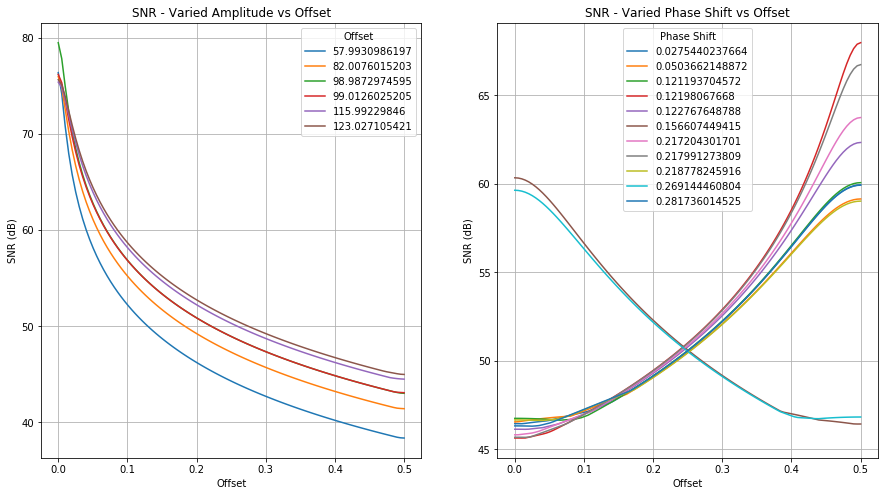

In [6]:
# Determining the best value for the offset

# Amplitude vs Offset
plt.subplot(1,2,1)
amplitudes = np.linspace(0.5, resolution/2, 5000)
offsets = np.linspace(0, 0.5, 100)
legend = []

for amp in amplitudes:
    rmsErrors = []
    for offset in offsets:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, offset, 0))
    if max(rmsErrors) > 75:
        plt.plot(offsets, rmsErrors)
        legend.append(amp)
plt.legend(legend, title='Offset')
plt.grid(which='both')
plt.title('SNR - Varied Amplitude vs Offset')
plt.xlabel('Offset')
plt.ylabel('SNR (dB)')

# Phase Shift vs Offset
plt.subplot(1,2,2)
phaseShifts = np.linspace(0, np.pi/8, 500)
legend = []

for shift in phaseShifts:
    rmsErrors = []
    for offset in offsets:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(127.5, offset, shift))
    if max(rmsErrors) > 59:
        plt.plot(offsets, rmsErrors)
        legend.append(shift)
plt.legend(legend, title='Phase Shift')
plt.grid(which='both')
plt.title('SNR - Varied Phase Shift vs Offset')
plt.xlabel('Offset')
plt.ylabel('SNR (dB)')
plt.show()

The first figure indicates that an offset of 0 produces the best results (not including phase shift) <br>
The second figure shows that either an offset of 0 or 0.5 is good, but the deviation in the first suggests an offset of 0 is always better.

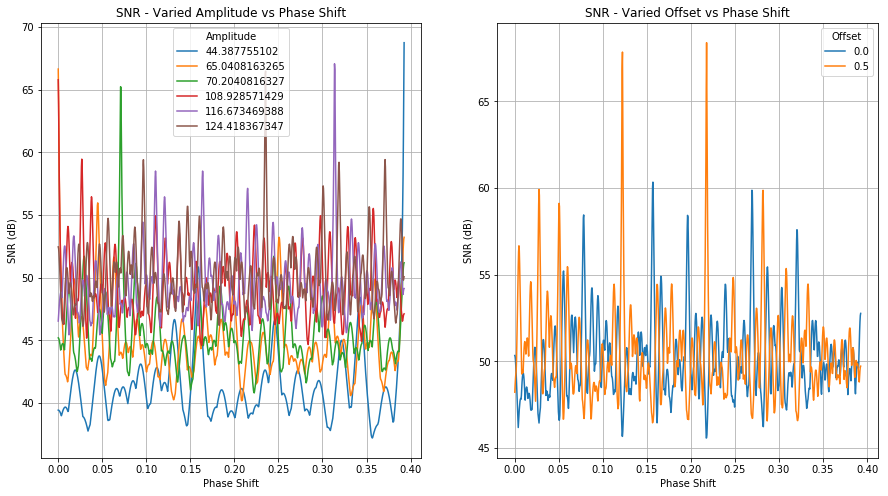

In [7]:
# Determining the best value for the phase shift

# Amplitude vs Phase Shift
plt.subplot(1,2,1)
amplitudes = np.linspace(0.5, resolution/2, 50)
phaseShifts = np.linspace(0, np.pi/8, 1000)
legend = []

for amp in amplitudes:
    rmsErrors = []
    for shift in phaseShifts:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, shift))
    if max(rmsErrors) > 65:
        plt.plot(phaseShifts, rmsErrors)
        legend.append(amp)
plt.legend(legend, title='Amplitude')
plt.grid(which='both')
plt.title('SNR - Varied Amplitude vs Phase Shift')
plt.xlabel('Phase Shift')
plt.ylabel('SNR (dB)')

# Offset vs Phase Shift
plt.subplot(1,2,2)
offsets = np.linspace(0, 0.5, 2)
legend = []

for offset in offsets:
    rmsErrors = []
    for shift in phaseShifts:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(127.5, offset, shift))
    if max(rmsErrors) > 60:
        plt.plot(phaseShifts, rmsErrors)
        legend.append(offset)
plt.legend(legend, title='Offset')
plt.grid(which='both')
plt.title('SNR - Varied Offset vs Phase Shift')
plt.xlabel('Phase Shift')
plt.ylabel('SNR (dB)')
plt.show()

The first plot shows that, in general, the quantization error decreases with an amplitude increase, but the peak SNR of each amplitude is seemingly random.
The second plot resulted in the validation that an offset of 0 or 0.5 produces the best results.

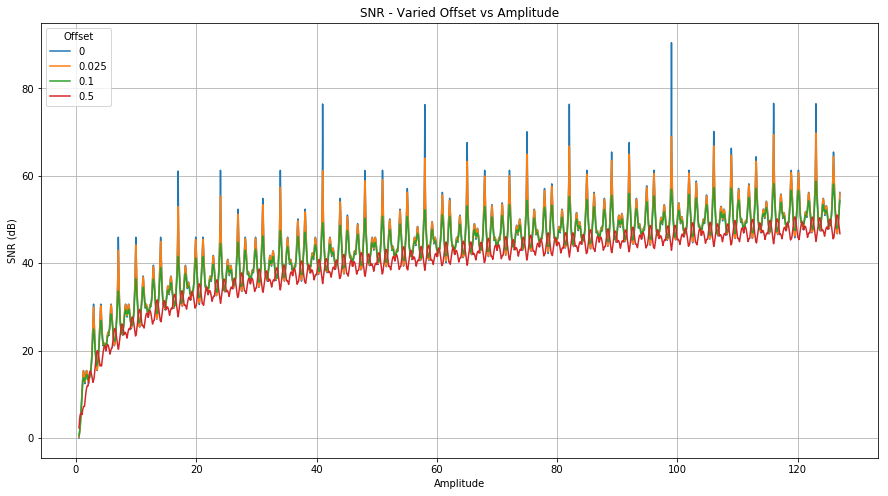

In [8]:
# Determining the best value for the Amplitude

# Offset vs Amplitude
amplitudes = np.linspace(0.5, resolution/2, 13780)
offsets = [0, .025, 0.1, 0.5]
legend = []

for offset in offsets:
    rmsErrors = []
    for amp in amplitudes:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, offset, 0))
    plt.plot(amplitudes, rmsErrors)
    legend.append(offset)
plt.legend(legend, title='Offset')
plt.grid(which='both')
plt.title('SNR - Varied Offset vs Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.show()

The figure above shows that, as the offset approaches 0, the SNR peaks get larger. The deviation in these peaks is much greater then that of the other varied offset plots, illustrating that an offset of 0 is the best (not 0.5).

Furthermore, these peaks occur at the same amplitude, regardless of the offset. If you look close enough, you will see a pattern in the peaks; Every fourth major spike is substantially larger than the three before it. This suggests that an amplitude of ~99 is the best peak you can find, not considering phase shift.

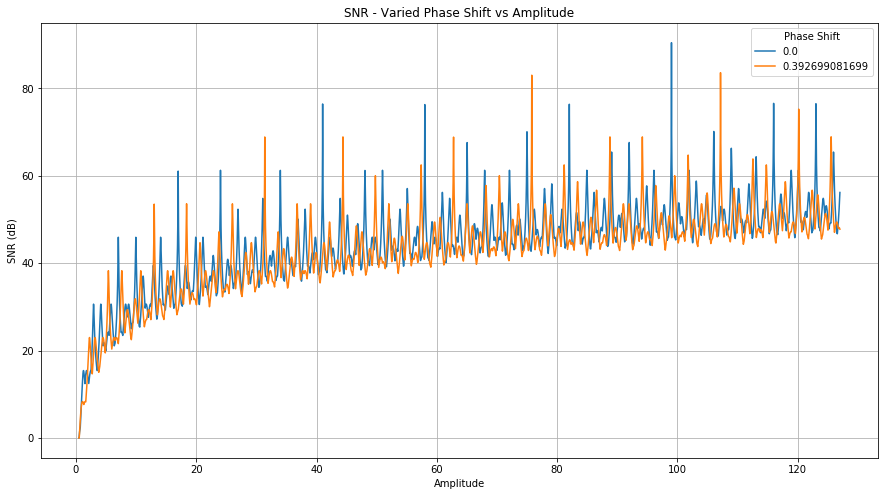

In [9]:
# Phase Shift vs Amplitude
plt.figure()
amplitudes = np.linspace(0.5, resolution/2, 13780)
phaseShifts = np.linspace(0, np.pi/8, 50)
legend = []

for shift in phaseShifts:
    rmsErrors = []
    for amp in amplitudes:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, shift))
    if max(rmsErrors) > 75:
        plt.plot(amplitudes, rmsErrors)
        legend.append(shift)
plt.legend(legend, title='Phase Shift')
plt.grid(which='both')
plt.title('SNR - Varied Phase Shift vs Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.show()

From the above figure, the same pattern is seen. Interestingly enough, a phase offset of 0 resulted in this pattern shifted to maximize the peak in SNR.

A couple of other things to consider are the number of bits used to represent the signal (bit resolution) and the number of sampling points to use. Since the varied offset vs amplitude plot showed the most variance in SNR, it will be used as the benchmark to decide on the best number of sample points and number of bits to use.


### <center> Number of Samples </center>

Some special cases are shown below in which the values of the signals at the sample points all land exactly on integers for given values of the amplitude. Sampling the signal at 4 points results in the values being integers whenever the amplitude is an integer. For 6 samples, the values are integers whenever the amplitude is a multiple of $\frac{2}{\sqrt{3}}$

<img src="./Images/numSamples.png" height="800" width="650"/>
![](D:/_TinyHawk/Simulation/Quantization/Images/numSamples.png)

The plot below illustrates the best results when increasing the number of samples up to 15 samples. Only the plots with SNR peaks above 90 dB were kept.

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


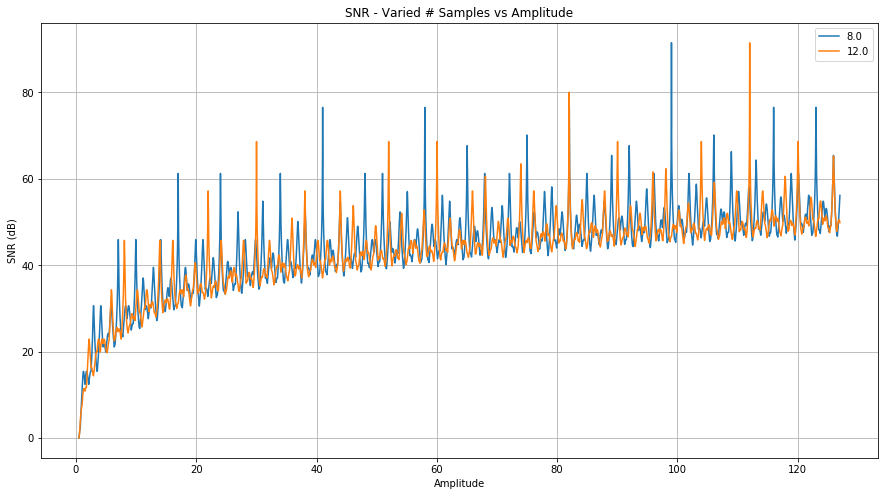

In [17]:
# Determining the best number of sample points

# Offset vs Amplitude
numBits = 8
resolution = 2**numBits-1
numSteps = np.linspace(7, 15, 9)
amplitudes = np.linspace(0.5, resolution/2, 65700)
legend = []

for sample in numSteps:
    angles = np.linspace(0, 2*np.pi, sample, endpoint=False)
    rmsErrors = []
    for amp in amplitudes:
        rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, 0, sample))
    if (max(rmsErrors) > 90):
        plt.plot(amplitudes, rmsErrors)
        legend.append(sample)
plt.legend(legend)
plt.grid(which='both')
plt.title('SNR - Varied # Samples vs Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.show()

### <center> Resolution Bits </center>

The next thing to consider is the number of bits used to represent the signal (amplitude resolution). The vertical red lines mark the end of the bit.

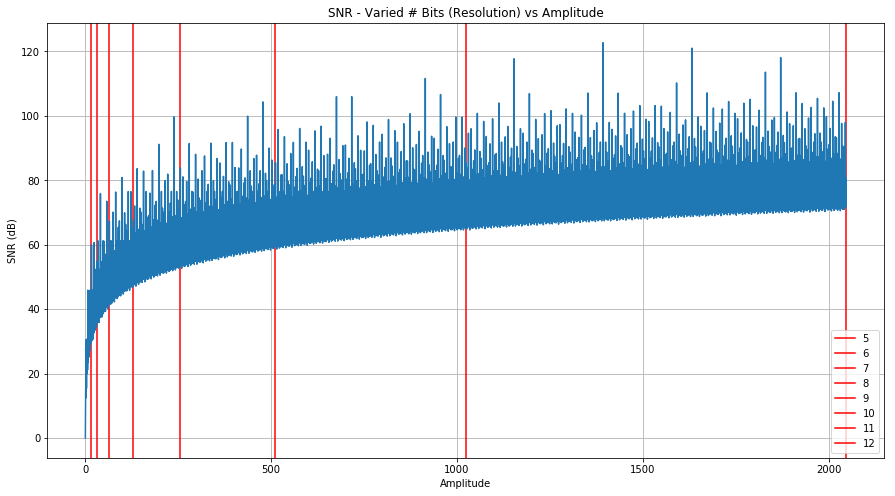

In [11]:
# Determining the best number of bits (resolution)

# Offset vs Amplitude
numBits = 12
resolution = float(2**numBits-1)
angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
legend = []

amplitudes = np.linspace(0.5, resolution/2, 93700)
rmsErrors = []
maxSNR = []
normSNR = []
amp = 0
error = 0
i = 1
maxError = 0
for amp in amplitudes:
    if amp >= float(2**i-1)/2:
        maxSNR.append(maxError)
        normSNR.append(error)
        maxError = 0
        i = i+1
    error = 10*np.log10(amp**2/2) - calcError(amp, 0, 0)
    rmsErrors.append(error)
    if error > maxError:
        maxError = error

for x in range(5, numBits+1):
    plt.axvline(float(2**x-1)/2, color='r')
    legend.append(x)
plt.plot(amplitudes, rmsErrors)
plt.legend(legend)
plt.grid(which='both')
plt.title('SNR - Varied # Bits (Resolution) vs Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.show()

Note that it is sufficient to show only one plot, since each would be identical when varying the resolution, at least up until its max amplitude value of resolution/2.

### <center> Results </center>

Quantization error is generally approximated by 6 dB/bit + 1.76 dB. This assumes the entire bit range is used. By not utilizing the entire range, the SNR is improved to about 10 dB/bit + 1.76 dB.

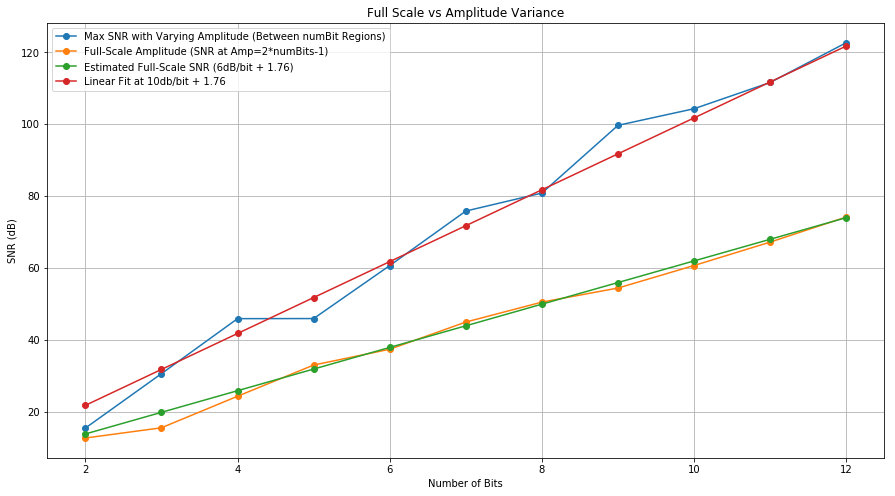

In [12]:
# Full Scale Amplitude vs Custom Amplitude SNR

bitRange = range(2, numBits+1)
plt.plot(bitRange, maxSNR[1:], '-o')
plt.plot(bitRange, normSNR[1:], '-o')
plt.plot(bitRange, 6.02*np.array(bitRange)+1.76, '-o')
plt.plot(bitRange, 10*np.array(bitRange)+1.76, '-o')
plt.legend(['Max SNR with Varying Amplitude (Between numBit Regions)', 'Full-Scale Amplitude (SNR at Amp=2*numBits-1)', 'Estimated Full-Scale SNR (6dB/bit + 1.76)', 'Linear Fit at 10db/bit + 1.76'])
plt.title('Full Scale vs Amplitude Variance')
plt.xlabel('Number of Bits')
plt.ylabel('SNR (dB)')
plt.grid(which='both')
plt.show()

Being able to use a custom value for the amplitude greatly increases the SNR with respect to the quantization error. The linear fit of the points indicates an increase of 4 dB/bit! Unfortunately, using a LUT on a DDS for example, would use the full range of the number of bits it has.

### <center> Verifying Results </center>

Using the results from above, it is clear that the amplitude parameter most greatly affects the resulting SNR. Thus, setting the amplitude to the highest peak at ~99, we can then verify that an offset of 0 and phase shift of 0 will produce the best resulting SNR.

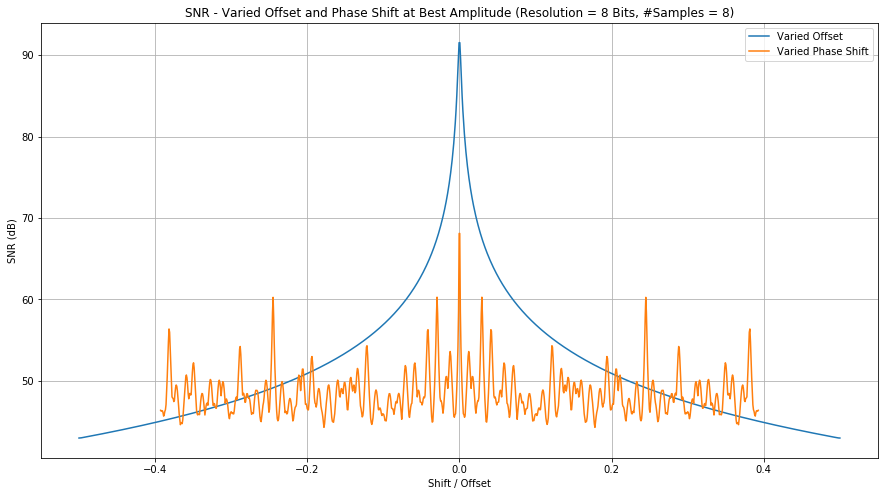

In [13]:
# Varied Offset and Phase Shift at Best Amplitude
numSteps = 8
angles = np.linspace(0, 2*np.pi, numSteps, endpoint=False)

amp = 98.9974747475
offsets = np.linspace(-0.5, 0.5, 1000)
phaseShifts = np.linspace(-np.pi/8, np.pi/8, 1000)

rmsErrors = []
for offset in offsets:
    rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, offset, 0))
plt.plot(offsets, rmsErrors)

rmsErrors = []
for shift in phaseShifts:
    rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, shift))
plt.plot(phaseShifts, rmsErrors)

plt.grid(which='both')
plt.title('SNR - Varied Offset and Phase Shift at Best Amplitude (Resolution = 8 Bits, #Samples = 8)')
plt.xlabel('Shift / Offset')
plt.ylabel('SNR (dB)')
plt.legend(['Varied Offset', 'Varied Phase Shift'])
plt.show()

The above plot illustrates that a change in offset or a change in phase shift, both whose values are 0, will result in a decrease in SNR. It should be observed that the SNR is much more sensitive to the change in phase shift than it is a change in offset.

### <center> Magnified Regions </center>

To illustrate the sensitivity of the SNR at its highest peak, a magnified plot of the region of interest is shown below. Again, with 6 samples, the SNR would approach infinity with the amplitude at multiples of $\frac{2}{\sqrt{3}}$ 

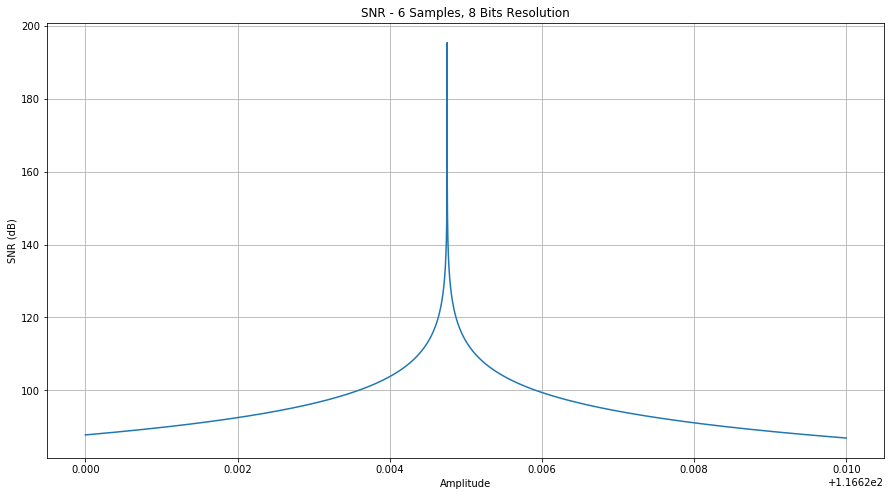

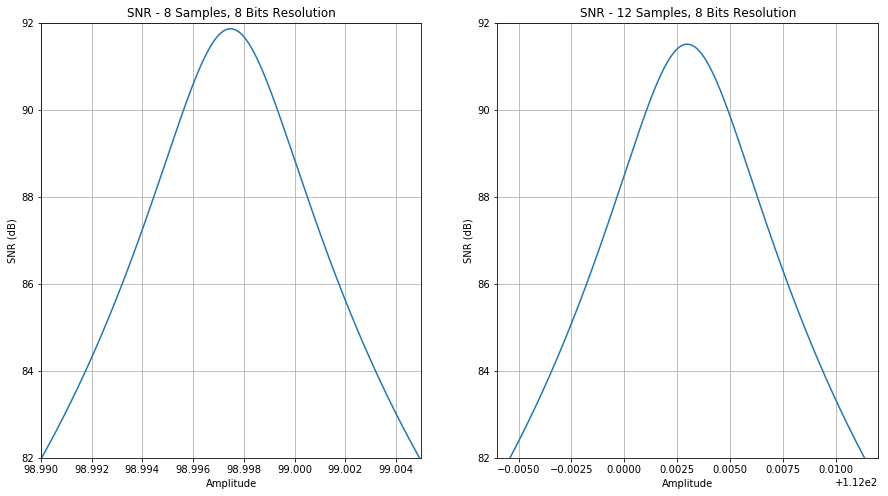

In [14]:
# Magnified Regions of Best SNR

# 6 Samples
amplitudes = np.linspace(116.62, 116.63, 138700)
angles = np.linspace(0, 2*np.pi, 6, endpoint=False)

rmsErrors = []
for amp in amplitudes:
    rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, 0, 6))
plt.plot(amplitudes, rmsErrors)
plt.grid(which='both')
plt.title('SNR - 6 Samples, 8 Bits Resolution')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.show()

# 8 Samples
plt.figure()
plt.subplot(1, 2, 1)
amplitudes = np.linspace(98.99, 99.005, 13870)
angles = np.linspace(0, 2*np.pi, 8, endpoint=False)

rmsErrors = []
for amp in amplitudes:
    rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, 0, 8))
plt.plot(amplitudes, rmsErrors)
plt.grid(which='both')
plt.title('SNR - 8 Samples, 8 Bits Resolution')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.axis([98.99, 99.005, 82, 92])

# 12 Samples
plt.subplot(1, 2, 2)
amplitudes = np.linspace(111.994, 112.012, 13870)
angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

rmsErrors = []
for amp in amplitudes:
    rmsErrors.append(10*np.log10(amp**2/2) - calcError(amp, 0, 0, 12))
plt.plot(amplitudes, rmsErrors)
plt.grid(which='both')
plt.title('SNR - 12 Samples, 8 Bits Resolution')
plt.xlabel('Amplitude')
plt.ylabel('SNR (dB)')
plt.axis([111.994, 112.012, 82, 92])
plt.show()

The sensitivity of the amplitude in the last two plots are about the same; A change in amplitude of ±0.008 results in the SNR dropping by about 10dB.

### <center> Digital Representation </center>

Sampling speed could present a restriction in implementation on an FPGA. An alternative would be using high speed logic gates, if the resulting circuit is relatively simple enough.

Using 8 bits of resolution and 8 sampling points, the rounded values of the signal (shown in the table below) are used to determine if a digital form of sampling is reasonable. ABC represent the sample point and the output is the resulting 8 bit binary value representing the value at the sample point.

In [15]:
# Rounded Signal Values at the numBits sample points:
numBits = 8
resolution = 2**numBits-1
amp = 98.9974747475
offset = 0
shift = 0
angles = np.linspace(0, 2*np.pi, 8, endpoint=False)

print 'ABC | abcdefgh'
print '----+---------'

i = 0
ones = ['', '', '', '', '', '', '', '']
for angle in angles:
    val = np.rint( amp * np.sin(angle + shift) + offset + resolution/2)
    binVal = "{0:08b}".format(int(val))
    print "{0:03b}".format(i) + ' | ' + binVal
    for j in range(0,8):
        if binVal[j] == '1':
            ones[j] += str(i) + ','
    i += 1

for i in range(0,8):
    ones[i] = ones[i][:-1]
    ones[i] = map(int, ones[i].split(','))

ABC | abcdefgh
----+---------
000 | 01111111
001 | 11000101
010 | 11100010
011 | 11000101
100 | 01111111
101 | 00111001
110 | 00011100
111 | 00111001


Using the Quine–McCluskey algorithm, the resulting set of digital logic could be used to represent the sampled signal.

In [16]:
# Resulting digital logic to represent the rounded signal values
inputs = ['A', 'B', 'C']
outputs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

j = 0
for item in ones:
    minReal = qm.simplify(item, [], 3)
    print outputs[j] + ' = ' + qm.convert(minReal, inputs)
    j = j + 1

a = A'B + A'C 
b = A' + B'C' 
c = AC + A'C' + AB' 
d = A + B'C' 
e = A + B'C' 
f = AC' + A'C + A'B' 
g = A'C' + B'C' 
h = B' + C 


And by utilizing a freeware program called 'Logic Friday', the digital logic results from above was verified and the minimum amount of logic gates found as shown below

<img src="./Images/LogicGates.png" height="500" width="400"/>
![](D:/_TinyHawk/Simulation/Quantization/Images/LogicGates.png)